In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam

# Load datasets
mat_data = pd.read_csv('student-mat.csv', delimiter=';')
por_data = pd.read_csv('student-por.csv', delimiter=';')

# Print column names to verify
print("Columns in Math dataset: ", mat_data.columns)
print("Columns in Portuguese dataset: ", por_data.columns)

# Merge datasets
combined_data = pd.concat([mat_data, por_data]).drop_duplicates().reset_index(drop=True)

# Check if G1, G2, G3 columns exist
if 'G1' in combined_data.columns and 'G2' in combined_data.columns and 'G3' in combined_data.columns:
    print("Grades columns found.")
else:
    print("Grades columns not found. Please check the column names.")

import random
random.seed(0)

Columns in Math dataset:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns in Portuguese dataset:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Grades columns found.


In [ ]:
# Merge datasets

# Handle missing values (if any)
# combined_data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

# Normalize/Standardize numeric values
scaler = StandardScaler()
numeric_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# Prepare data for RNN
X = combined_data.drop([ 'G3'], axis=1).values
y = combined_data[[ 'G3']].values

# Reshape X for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LSTM model**

In [ ]:
LSTMmodel = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Predicting G1
])

LSTMmodel.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
LSTMhistory = LSTMmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 4s 41ms/step - loss: 0.8972 - val_loss: 0.9621
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.7607 - val_loss: 0.7491
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5587 - val_loss: 0.5113
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 0.3966 - val_loss: 0.3496
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 0.2775 - val_loss: 0.2553
Epoch 6/50
21/21 [==============================] - 0s 8ms/step - loss: 0.2093 - val_loss: 0.2107
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1900 - val_loss: 0.2015
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1662 - val_loss: 0.1868
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1647 - val_loss: 0.1786
Epoch 10/50
21/21 [==============================] - 0s 8ms/step - loss: 0.1504 - val_loss: 0.1703
Epoch 11/50
21/21 

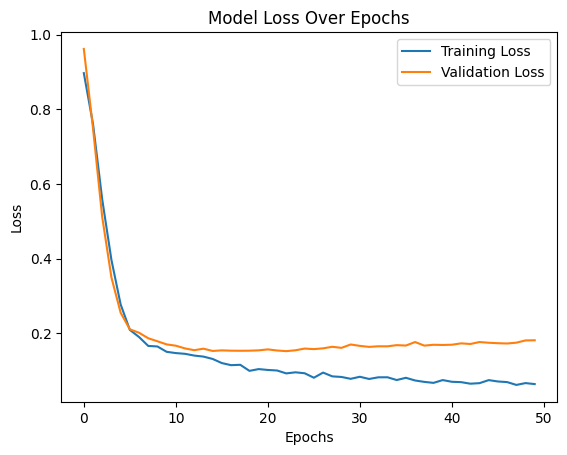

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(LSTMhistory.history['loss'], label='Training Loss')
plt.plot(LSTMhistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
LSTMmodel.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2520


0.25200679898262024

In [ ]:
y_pred = LSTMmodel.predict(X_test)

7/7 [==============================] - 1s 3ms/step


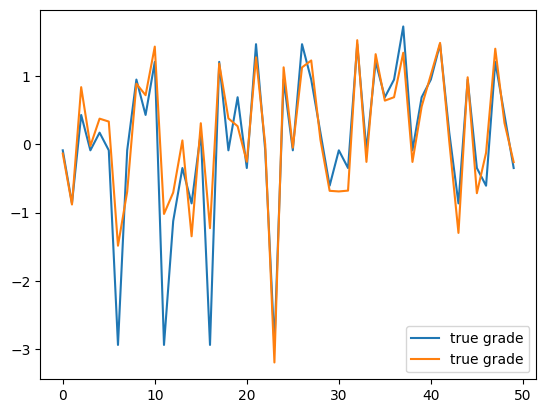

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(50), y_test[:50], label='true grade')
plt.plot(range(50), y_pred[:50], label='true grade')
plt.legend()
plt.show()

# **RNN MODEL**

In [ ]:
Rnnmodel = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1)  # Predicting G1
])

Rnnmodel.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
RNNhistory = Rnnmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 2s 20ms/step - loss: 1.6061 - val_loss: 0.7627
Epoch 2/50
21/21 [==============================] - 0s 8ms/step - loss: 0.7449 - val_loss: 0.4578
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5815 - val_loss: 0.3673
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4505 - val_loss: 0.3124
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 0.3972 - val_loss: 0.2887
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.3883 - val_loss: 0.2793
Epoch 7/50
21/21 [==============================] - 0s 9ms/step - loss: 0.3689 - val_loss: 0.2621
Epoch 8/50
21/21 [==============================] - 0s 8ms/step - loss: 0.3461 - val_loss: 0.2531
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.3224 - val_loss: 0.2483
Epoch 10/50
21/21 [==============================] - 0s 8ms/step - loss: 0.3117 - val_loss: 0.2391
Epoch 11/50
21/21 

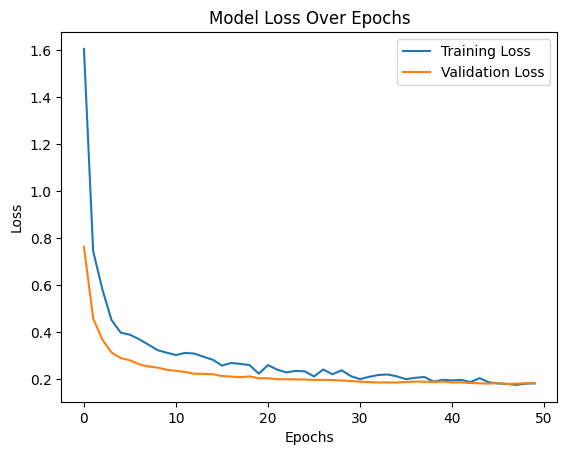

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(RNNhistory.history['loss'], label='Training Loss')
plt.plot(RNNhistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Rnnmodel.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2131


0.21307381987571716

In [ ]:
y_pred = Rnnmodel.predict(X_test)

7/7 [==============================] - 0s 3ms/step


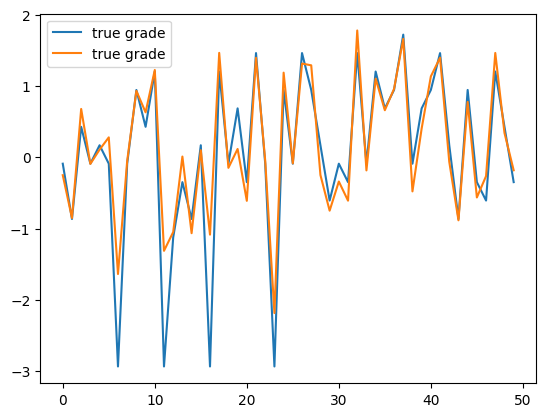

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(50), y_test[:50], label='true grade')
plt.plot(range(50), y_pred[:50], label='true grade')
plt.legend()
plt.show()

**bold text**# **GRU MODEL**

In [ ]:
GRUmodel = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1)  # Predicting G1
])

GRUmodel.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
GRUhistory = GRUmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 4s 37ms/step - loss: 0.8144 - val_loss: 0.7502
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5125 - val_loss: 0.4556
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 0.3345 - val_loss: 0.3141
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.2422 - val_loss: 0.2537
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 0.2248 - val_loss: 0.2164
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.1919 - val_loss: 0.2006
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.1931 - val_loss: 0.1959
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1859 - val_loss: 0.1786
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1769 - val_loss: 0.1777
Epoch 10/50
21/21 [==============================] - 0s 8ms/step - loss: 0.1571 - val_loss: 0.1701
Epoch 11/50
21/21 

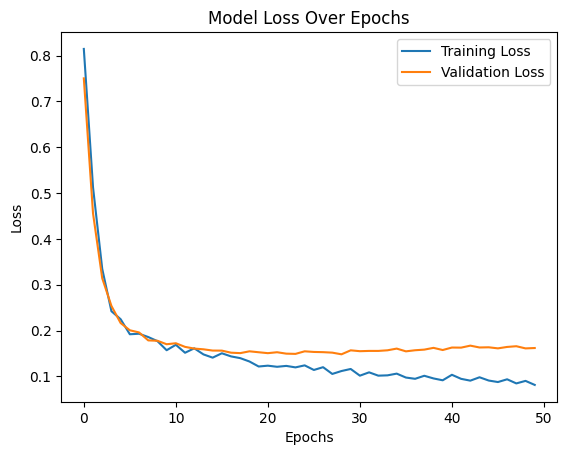

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(GRUhistory.history['loss'], label='Training Loss')
plt.plot(GRUhistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
GRUmodel.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2554


0.2553582191467285

In [ ]:
y_pred = GRUmodel.predict(X_test)

7/7 [==============================] - 1s 3ms/step


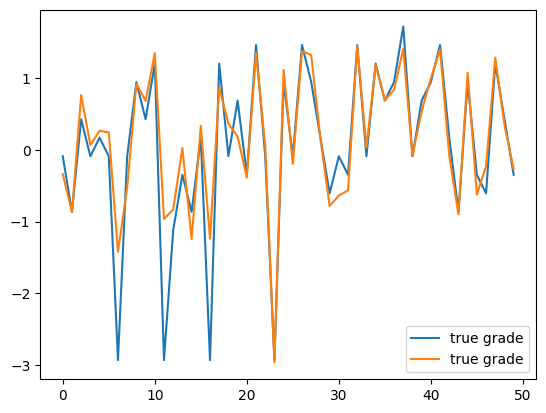

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(50), y_test[:50], label='true grade')
plt.plot(range(50), y_pred[:50], label='true grade')
plt.legend()
plt.show()